# Linear Regression II: Multiple Linear Regression 
Agenda today:
- Learn how to include multiple predictors into a model 
- Handling (Multi)Collinearity in regression 
- Handling Categorical Variables for regression

## Part I. Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the __proportion of variance explained by the model__. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?

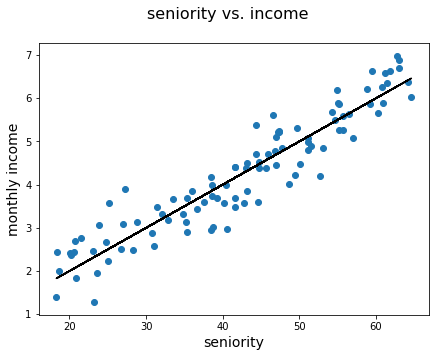

In [40]:
# an example 
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

what if we include another factor, such as years of education? All that is doing is adding a higher dimensional object to the model, so our model will be three dimensional. 
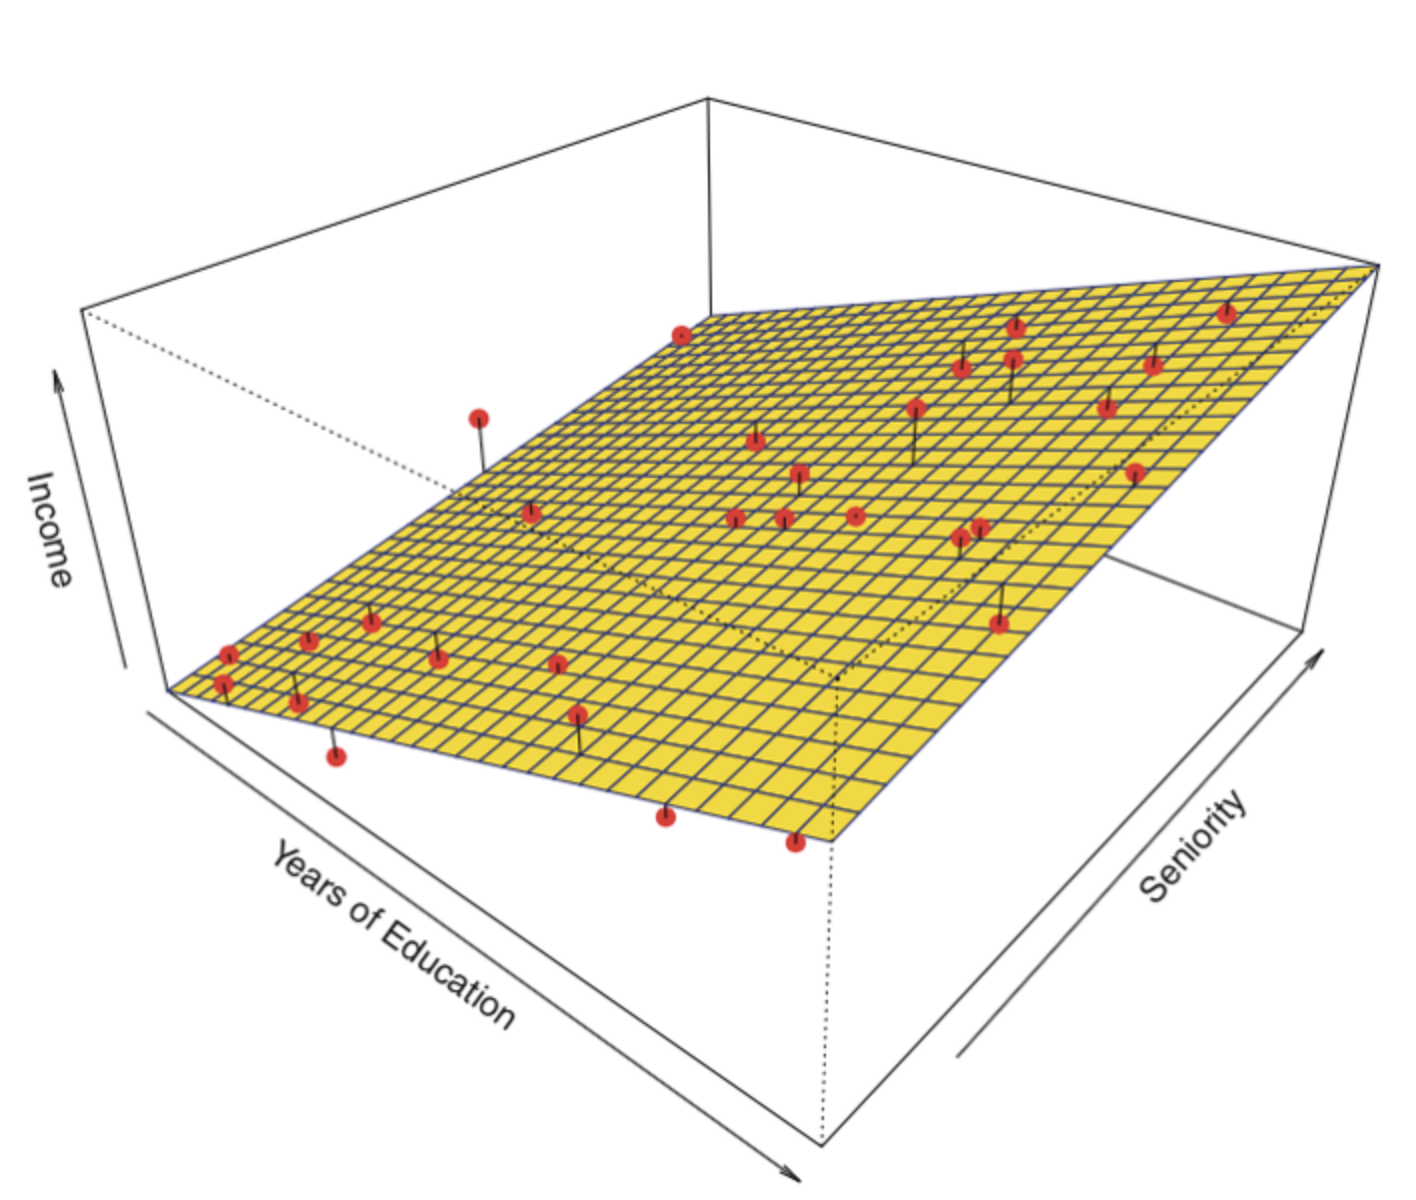

### Interpretation of Multiple Linear Regression
In multiple regression, each coefficient is interpreted as the estimated change in y associated with one unit change in a variable, __while holding all other variables constant__.

For example, if the relationship of income, senior, and years of education can be modeled as:
$$Y = 500 + 50X_1 + 48X_2 $$,
where:
- $X_1$ = Seniority, and
- $X_2$ = Years of education <br>

How would you interpret the coefficients appropriately?

## Part II. Handling (Multi)collinearity 
Multiple regression is evaluated by examining the increase in $R^2$ -- whether a variable is worth adding to the model depends on whether the $R^2$ increase significantly after including it. Collinearity and Multicollinearity occur when various predictors in the models are correlated with each other. As we can imagine, if we have two highly correlated feature, one of them will not contribute greatly to the model. Therefore, we want to examine the correlated features and remove them. 

The best way to examine correlation is to use the seaborn correlation heatmap

In [28]:
bikeshare = pd.read_csv('bikeshare.csv')
bikeshare_predictors = bikeshare.iloc[:,2:15]
corr = bikeshare_predictors.corr()

In [29]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089


In [31]:
corr[abs(bikeshare_predictors.corr() > 0.75)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.00000,NaN,0.83144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.83144,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.991702,NaN,NaN,NaN,NaN
atemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991702,1.000000,NaN,NaN,NaN,NaN
hum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


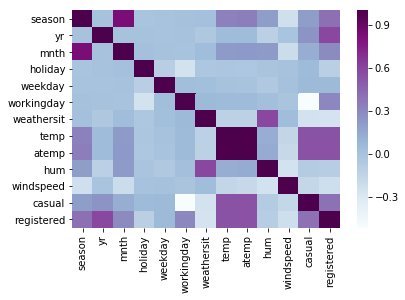

In [32]:
sns.heatmap(corr,cmap = 'BuPu')
# as we can see, month and season are highly correlated, as well as temp and atemp, so we might want to remove those
# features if we were to conduct multiple linear regression 

## Part III. Working with Categorical Variable 
As we have covered last week, including categorical variables in linear regression allows us to compare mean values for different groups. We can work with categorical variables in multiple regression by transforming it to dummy variable. 

Converting a categorical variable to dummy variables is essentially creating new columns of $(n-1)$ encoded as either 1 or 0, where n represents the levels in the variable. For example, if we want to convert the season variable from last week to dummy variable, we would create 3 columns for them. Let's look at an example

In [33]:
bikeshare = pd.read_csv('bikeshare.csv')
bikeshare.dtypes.value_counts()

int64      11
float64     4
object      1
dtype: int64

In [34]:
# select the datatypes that are integers
bikeshare.select_dtypes(include='int').head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,1,0,1,0,6,0,2,331,654,985
1,2,1,0,1,0,0,0,2,131,670,801
2,3,1,0,1,0,1,1,1,120,1229,1349
3,4,1,0,1,0,2,1,1,108,1454,1562
4,5,1,0,1,0,3,1,1,82,1518,1600


In [35]:
# convert one variable to dummy variable 
bikeshare['weathersit'].unique()

array([2, 1, 3])

In [36]:
# because there are three levels, we wnat to create two new columns of dummy variable 
weekday_dummy = pd.get_dummies(bikeshare['weekday'],prefix = 'weekday', drop_first=True)
weathersit_dummy = pd.get_dummies(bikeshare['weathersit'],prefix = 'weathersit', drop_first=True)


#### Visualizing categorical variables 

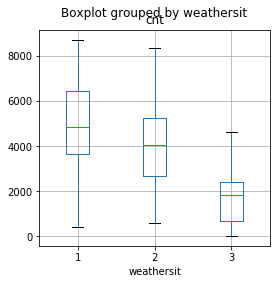

In [37]:
bikeshare.boxplot('cnt',by = 'weathersit',figsize = (4,4))

In [39]:
temp_reg_weathersit = ols(formula = 'cnt~weathersit_2+weathersit_3',data=bikeshare_with_dummies).fit()
temp_reg_weathersit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Thu, 02 May 2019   Prob (F-statistic):           3.11e-17
Time:                        10:24:19   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4876.7862     85.567     56.994      0.000    4708.798    5044.774
weathersit_2  -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
weathersit_3 -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model for only using Weather situation as a predictor takes the form of:
$$Y = 4876.7862 - 840.9238X_1 - 3073.5005X_2$$

We can interpret that as:

- when the weather situation is 1, the mean value of bikeshare rentals is 4876.78;
- when the weather situation is 2, the mean value of bikeshare is 4876.7862 - 840.9238 * 1 = 4035.86
- when the weather situation is 2, the mean value of bikeshare is 4876.7862 - 840.9238 * 0 - 3073.5005 * 1 = 1803.28 

In [15]:
weekday_dummy

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,0,0,1
8,0,0,0,0,0,0
9,1,0,0,0,0,0


In [24]:
bikeshare_with_dummies = pd.concat([bikeshare, weekday_dummy, weathersit_dummy], axis = 1)
bikeshare_with_dummies.drop(['weekday','weathersit'],axis=1);

#### Multiple Linear Regression in Statsmodel 

In [43]:
bikeshare.head(5)
bikeshare.shape

(731, 16)

In [46]:
# examine the features most correlated with the outcome
corr = bikeshare.corr()
abs(corr).sort_values(by = 'cnt',  ascending= False)['cnt']

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
weathersit    0.297391
mnth          0.279977
windspeed     0.234545
hum           0.100659
holiday       0.068348
weekday       0.067443
workingday    0.061156
Name: cnt, dtype: float64

In [47]:
# let's build a simple linear regression model first
bikeshare_reg_simple = ols(formula= "cnt~registered+casual", data=bikeshare).fit()
bikeshare_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.286e+31
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:                 17667.
No. Observations:                 731   AIC:                        -3.533e+04
Df Residuals:                     728   BIC:                        -3.531e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.566e-11   7.36e-13     21.272      0.000    1.42e-11    1.71e-11
registered     1.0000      2e-16      5e+15      0.000       1.000       1.000
casual         1.0000   4.54e-16    2.2e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       35.588   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.751
Skew:                          -0.020   Prob(JB):                     0.000626
Kurtosis:                       2.305   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What's the problem of the above model?

In [48]:
# including 2 predictors
bikeshare_reg_mult = ols(formula = "cnt~atemp+instant",data=bikeshare_with_dummies).fit()
bikeshare_reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     804.8
Date:                Thu, 02 May 2019   Prob (F-statistic):          3.83e-185
Time:                        11:55:54   Log-Likelihood:                -6143.3
No. Observations:                 731   AIC:                         1.229e+04
Df Residuals:                     728   BIC:                         1.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -415.5218    133.927     -3.103      0.002    -678.451    -152.592
atemp       6512.5557    248.786     26.177      0.000    6024.132    7000.980
instant        5.0017      0.192     26.051      0.000       4.625       5.379
==============================================================================
Omnibus:                      121.935   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.445
Skew:                          -0.933   Prob(JB):                     1.25e-56
Kurtosis:                       5.229   Cond. No.                     2.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
bikeshare_reg_mult_dummy = ols(formula="cnt~weathersit_2+weathersit_3+temp+hum+weekday_1+weekday_2+weekday_3+weekday_4+weekday_5+weekday_6",
                               data=bikeshare_with_dummies).fit()
bikeshare_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     62.35
Date:                Thu, 02 May 2019   Prob (F-statistic):           9.99e-91
Time:                        11:56:27   Log-Likelihood:                -6341.7
No. Observations:                 731   AIC:                         1.271e+04
Df Residuals:                     720   BIC:                         1.276e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1837.5358    314.302      5.846      0.000    1220.478    2454.594
weathersit_2  -430.9696    138.878     -3.103      0.002    -703.623    -158.316
weathersit_3 -2337.4091    351.283     -6.654      0.000   -3027.070   -1647.749
temp          6489.1074    300.892     21.566      0.000    5898.376    7079.839
hum           -958.5201    478.295     -2.004      0.045   -1897.539     -19.501
weekday_1      106.0595    197.315      0.538      0.591    -281.321     493.440
weekday_2      263.3640    198.241      1.329      0.184    -125.836     652.564
weekday_3      349.1066    198.683      1.757      0.079     -40.962     739.175
weekday_4      349.5337    198.511      1.761      0.079     -40.196     739.263
weekday_5      395.0182    198.543      1.990      0.047       5.227     784.810
weekday_6      407.4679    197.659      2.061      0.040      19.411     795.525
==============================================================================
Omnibus:                       27.778   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.348
Skew:                           0.179   Prob(JB):                     0.000465
Kurtosis:                       2.387   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part III. Working with Transformation and Assumption Violations

####  Log Transformation
- While it is not necessary for your predictors to be normally distributed, having normally distrbuted predictors can benefit your model overall
- Upon examining the distributional shape of your predictors, consider applying a log transformation on your predictors if they are non normal
- Log transformation also helps with the violation of nonlinearity (if the data are strictly positive)
    - Be mindful of whether you apply log transformation on the dependent and/or independent variables, and how the relationship can change as a function of the log transformation
    - Adding an engineered feature can also help. For example, if you believe a polynomial term $X^2$ can account for more variance in the outcome. 
        - Don't get carried away with it -- adding more polynomial terms might help you account for the variance in your model, but might not generalize to unseen data
- Log transformation can be applied to the dependent variable if the homoscedasticity assumption is violated
    - this might present in time series data, where variance increase as your predictor value grows as a function of inflation. We will return to this point later in the course


## Part IV. Validating your model

#### Using RMSE to validate your model

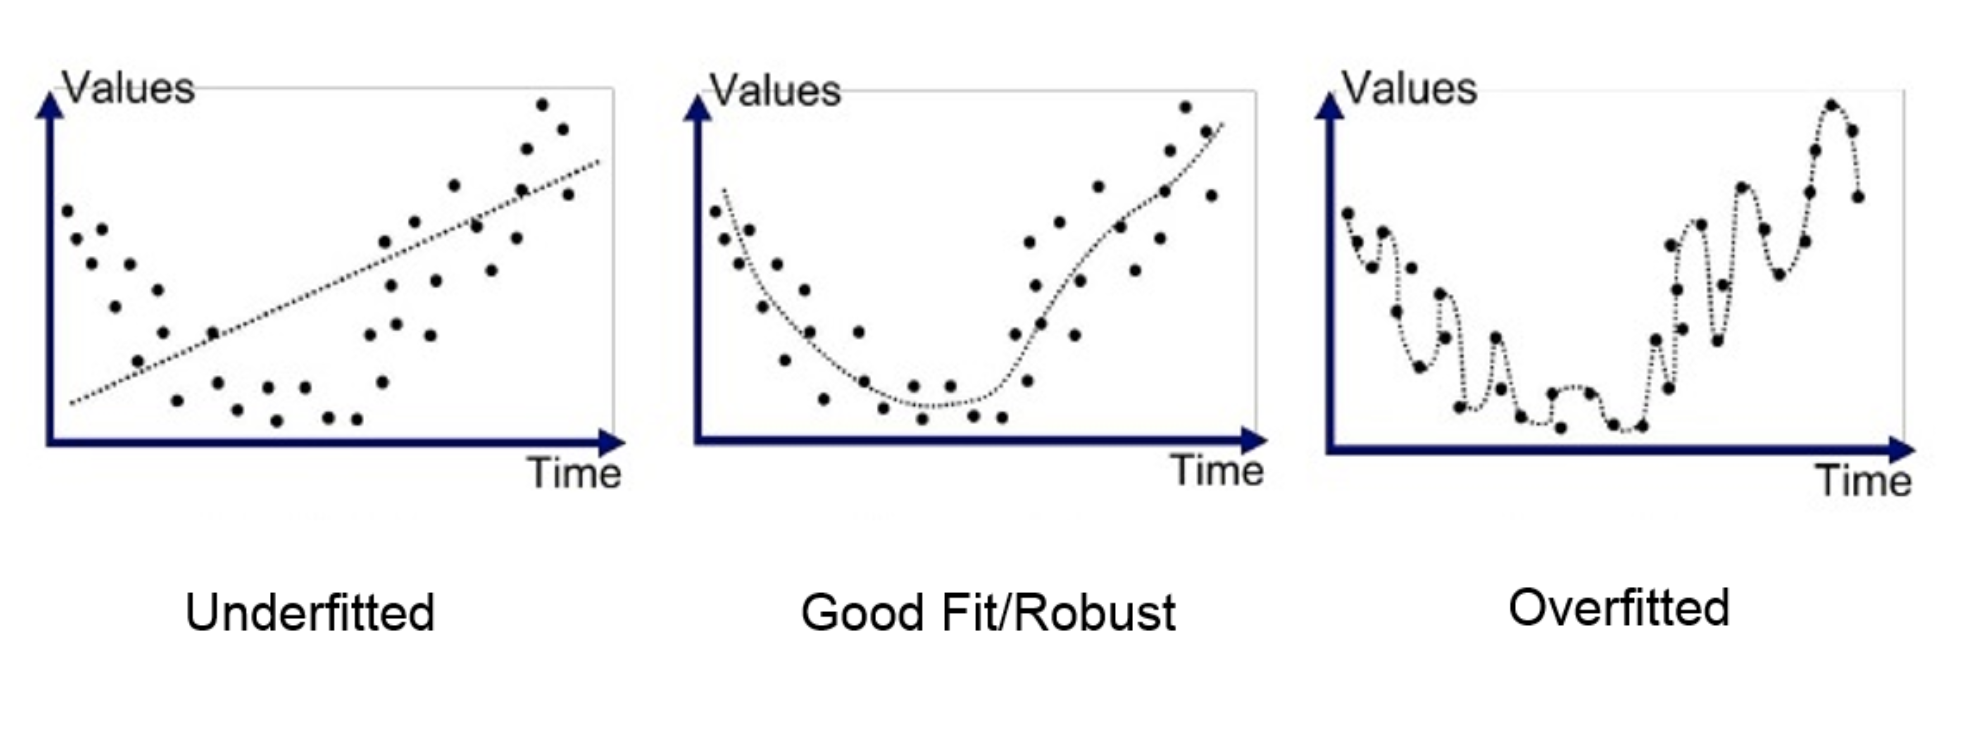

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

#### Train-Test Split 

#### Cross Validation



## Part IV. Work with Interaction Term for Multiple Regression 
Interaction is an interesting effect in regression (and ANOVA). For example, do years of education and gender affect income? How about the interaction effect of education **and** gender? To be specific, the effect of income from someone who is educated and male could be more than the mere addition of the two. There might be "something else" to it then being educated plus male, and that "something else" is **interaction**. In other words, interaction term is included as part of the linear regression because it could be more or less than the sum of their parts.

Bringing it back to the bikeshare example, would people be even less willing to rent bikes when it is holiday **and** the weather is terrible? Let's find out!

In [48]:
additive_model = ols(formula="cnt~temp + workingday", data = bikeshare_with_dummies).fit()
additive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     237.2
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           4.77e-80
Time:                        11:50:16   Log-Likelihood:                -6386.3
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     728   BIC:                         1.279e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1142.1347    177.461      6.436      0.000     793.738    1490.532
temp        6624.9996    305.622     21.677      0.000    6024.994    7225.005
workingday   117.3841    120.250      0.976      0.329    -118.694     353.463
==============================================================================
Omnibus:                       19.413   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.291
Skew:                           0.172   Prob(JB):                      0.00214
Kurtosis:                       2.466   Cond. No.                         8.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# include holiday and temperature 
bikeshare_interact = bikeshare[['temp','workingday']]
bikeshare_interact["temp_holiday"] = bikeshare_with_dummies["temp"] * bikeshare_with_dummies["workingday"]
bikeshare_interact= sm.add_constant(bikeshare_interact)
interact_model = sm.OLS(bikeshare_with_dummies['cnt'],bikeshare_interact).fit()

interact_model.summary()

/Users/flee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           3.14e-79
Time:                        11:50:28   Log-Likelihood:                -6385.3
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     727   BIC:                         1.280e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          850.0084    274.160      3.100      0.002     311.768    1388.248
temp          7232.0624    531.085     13.618      0.000    6189.419    8274.706
workingday     560.0844    338.865      1.653      0.099    -105.186    1225.355
temp_holiday  -907.0514    649.177     -1.397      0.163   -2181.538     367.435
==============================================================================
Omnibus:                       18.324   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.714
Skew:                           0.166   Prob(JB):                      0.00286
Kurtosis:                       2.476   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Visualizing interaction 
Essentially, linear regression with interaction terms allow us to fit different slopes to different levels of the categorical variables. Let's take a look at what that might look like

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()


In [56]:
weathersit_1 = bikeshare_with_dummies[bikeshare_with_dummies["weathersit"]==1]
weathersit_2 = bikeshare_with_dummies[bikeshare_with_dummies["weathersit"]==2]
weathersit_3 = bikeshare_with_dummies[bikeshare_with_dummies["weathersit"]==3]

In [60]:
temp_1 = weathersit_1["temp"].values.reshape(-1, 1)
temp_2 = weathersit_2["temp"].values.reshape(-1, 1)
temp_3 = weathersit_3["temp"].values.reshape(-1, 1)

In [61]:
regression_1.fit(temp_1, weathersit_1["cnt"])
regression_2.fit(temp_2, weathersit_2["cnt"])
regression_3.fit(temp_3, weathersit_3["cnt"])

pred_1 = regression_1.predict(temp_1)
pred_2 = regression_2.predict(temp_2)
pred_3 = regression_3.predict(temp_3)

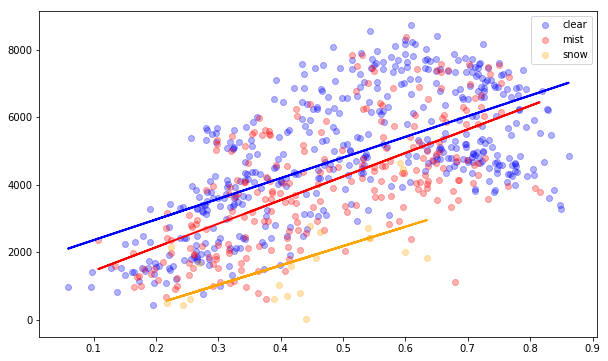

In [103]:
plt.figure(figsize=(10,6))

plt.scatter(temp_1, weathersit_1["cnt"],  color='blue', alpha = 0.3, label = 'clear')
plt.scatter(temp_2, weathersit_2["cnt"],  color='red', alpha = 0.3, label ='mist')
plt.scatter(temp_3, weathersit_3["cnt"],  color='orange', alpha = 0.3, label = 'snow')

plt.plot(temp_1, pred_1,  color='blue', linewidth=2)
plt.plot(temp_2, pred_2,  color='red', linewidth=2)
plt.plot(temp_3, pred_3,  color='orange', linewidth=2)

plt.ylabel("")
plt.xlabel("")
plt.legend();

## Part V. Polynomial Regression
Sometimes, the relationship between two variables might not be linear but curvilinear. In that scenario, we can add higher dimensional polynomial object to linearly transform the predictors such that the result can be better modeled to fit the outcome.

Degrees of polynomials:
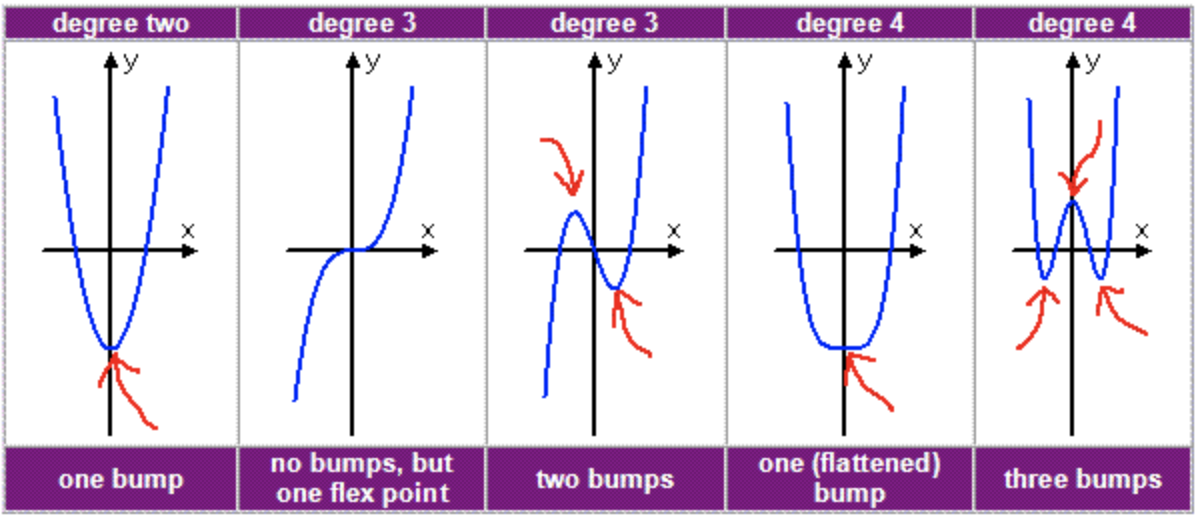

Sometimes simple linear regression cannot capture the curvilinear relationship between variables, so imposing a polynomial terms can better account for this relationship. 
Some of the example for this are:
- Anxiety vs. academic performance
- Energy vs. Focus
- Perceived confidence vs. amount of makeup 

In [104]:
# use the cars dataset 
auto = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [105]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

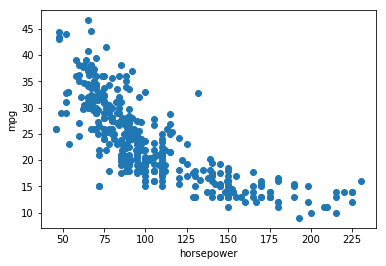

In [108]:
plt.scatter(auto.horsepower,auto.mpg)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [109]:
# transform the data
auto['horsepower_squared'] = auto['horsepower'] **2

In [110]:
# compare linear regression performance 
auto_simple_reg = ols(formula="mpg~horsepower",data=auto).fit()
auto_simple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           7.03e-81
Time:                        15:53:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# regression with polynomial term
auto_poly_reg = ols(formula="mpg~horsepower+horsepower_squared",data=auto).fit()
auto_poly_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           5.40e-99
Time:                        15:53:52   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower_squared     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion
In this lesson, you learned how to perform multiple regression, incorporate different variables, conduct feature engineering for variables, build and evaluate your models in statsmodel. There are so, so much more to linear modeling and you are encouraged to research into different methods and applications for linear models and incorporate them into your second project!

Here are a list of topics you're encouraged to look into:
- Bias variance trade-off and overfitting 
- Using Scikit Learn for regression 